In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

import key_rate_optimization as opt
from importlib import reload
reload(opt)

<module 'key_rate_optimization' from '/Users/gordonwongyl/Documents/ORF/Detector_efficiency/key_rate_optimization.py'>

In [160]:
# load data for 

df = pd.read_csv("opt_record_detector_depol_5e-5_2D.csv")
routines = ["<class 'key_rate_optimization.tgs_a_routine'>", "<class 'key_rate_optimization.tgs_f_routine'>", 
            "<class 'key_rate_optimization.rgs_a_routine'>", "<class 'key_rate_optimization.rgs_f_routine'>"]

# Divide optimization record based on the scheme used
df_list = []
for rout in routines:
    df_rout = df[df["rout"] == rout]
    # df_rout.sort_values(by=["T_SPIN_COHERENCE", "GAMMA"], ascending=[True, True])
    df_list.append(df_rout)
# df = df.sort_values(by=["rout", "T_SPIN_COHERENCE", "GAMMA"], ascending=[True, True, True])jj
# df.to_csv("opt_record_3000e3_2D_sort")

/var/folders/5m/d9qdltz940j7ch1nc4sgtqf00000gn/T/ipykernel_67556/1625260008.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
/var/folders/5m/d9qdltz940j7ch1nc4sgtqf00000gn/T/ipykernel_67556/1625260008.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, '$10^{-6}$', ' ', '$10^{-5}$', ' ', '$10^{-4}$'])


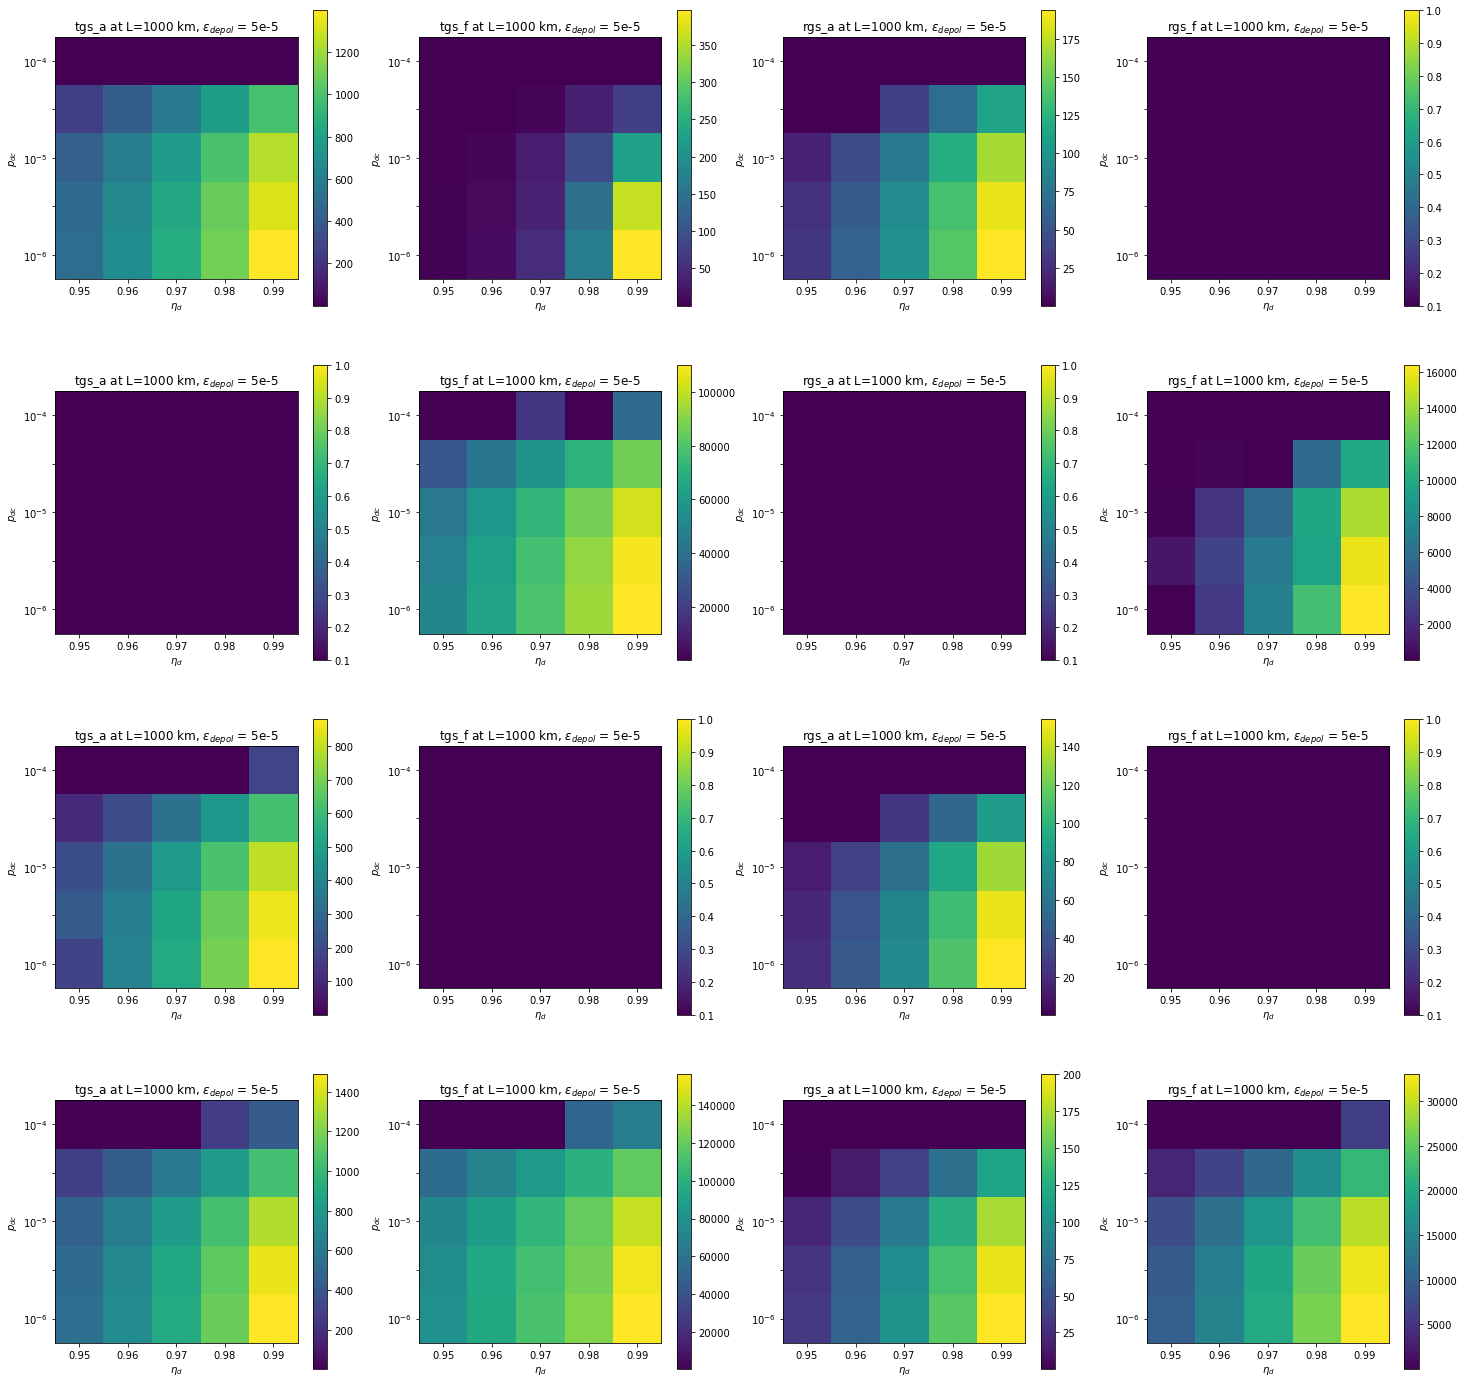

In [161]:
eta_d_list = np.arange(0.95, .99, 0.01)
p_dc_list = np.logspace(-6, -4, 5)
xx, yy = np.meshgrid(eta_d_list, p_dc_list)

GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]

heat_map_list = []

for g, t in zip(GAMMA, T_SPIN_COHERENCE):
    for df_in in range(len(df_list)):
        df = df_list[df_in]
        heat_map = np.zeros((len(p_dc_list), len(eta_d_list)))
        for i in range(len(p_dc_list)):
            for j in range(len(eta_d_list)):
                try:

                    heat_map[i,j] = df[((df["eta_d"]==eta_d_list[j]) & (df["p_dc"]==p_dc_list[i]))
                                       & (((df["GAMMA"]-g)<1) & ((df["T_SPIN_COHERENCE"]-t)<1e-5))]["best_solutions_fitness"]
                except:
                    try:
                         
                        heat_map[i,j] = df[(df["eta_d"]==eta_d_list[j]) & (df["p_dc"]==p_dc_list[i]) & ((df["GAMMA"]==g)) & ((df["T_SPIN_COHERENCE"]==t))]["best_solutions_fitness"]
                    except:
                         print("error")

        heat_map = np.where(heat_map==0, 0.1, heat_map)        
        heat_map_list.append(heat_map)       

names = ['tgs_a', 'tgs_f', 'rgs_a', 'rgs_f']
fig, axes = plt.subplots(4,4, figsize=(25,25))
fig.set_facecolor('white')


for ax, heat_map, name in zip(axes.reshape(-1), heat_map_list, names*4):
        vmin = 1e-1
        vmax = max(heat_map.max(), 1)
        norm = LogNorm(vmin=vmin, vmax=vmax)
        im = ax.imshow(heat_map,vmin=vmin, vmax=vmax, origin='lower')
        ax.set_xticklabels([0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
        ax.set_yticklabels([0, '$10^{-6}$', ' ', '$10^{-5}$', ' ', '$10^{-4}$'])

        ax.set_xlabel("$\eta_d$")
        ax.set_ylabel("$p_{dc}$")
        ax.set_title(name + f" at L={1000} km, " + "$\epsilon_{depol}$" + f" = 5e-5")
        fig.colorbar(im, ax= ax, orientation='vertical')
plt.show()
# fig.savefig('2Dmap_L_3000e3.png', facecolor='white')

In [ ]:
# 2D heat map over GAMMA and T_SPIN_COHERENCE 
# Load data
df = pd.read_csv("opt_record_3000e3_2D.csv")
routines = ["<class 'key_rate_optimization.tgs_a_routine'>", "<class 'key_rate_optimization.tgs_f_routine'>", 
            "<class 'key_rate_optimization.rgs_a_routine'>", "<class 'key_rate_optimization.rgs_f_routine'>"]

# Divide optimization record based on the scheme used
df_list = []
for rout in routines:
    df_rout = df[df["rout"] == rout]
    df_rout.sort_values(by=["T_SPIN_COHERENCE", "GAMMA"], ascending=[True, True])
    df_list.append(df_rout)
df = df.sort_values(by=["rout", "T_SPIN_COHERENCE", "GAMMA"], ascending=[True, True, True])
df.to_csv("opt_record_3000e3_2D_sort")

# Set up aces 
GAMMA = 10**np.arange(7,16)*2*np.pi
T_SPIN_COHERENCE = 10.**np.arange(-7,4)
xx, yy = np.meshgrid(T_SPIN_COHERENCE, GAMMA/2/np.pi)

# Construct a 2D matrix of fitness values, with 
heat_map_list = []
for df in df_list:
    heat_map = np.zeros((len(GAMMA), len(T_SPIN_COHERENCE)))
    for i in range(len(GAMMA)):
        for j in range(len(T_SPIN_COHERENCE)):
            heat_map[i,j] = df[(df["GAMMA"] == GAMMA[i]) & 
                               (df["T_SPIN_COHERENCE"] == T_SPIN_COHERENCE[j])]["best_solutions_fitness"]
    heat_map = np.where(heat_map==0, 0.1, heat_map)        
    heat_map_list.append(heat_map)
names = ['tgs_a', 'tgs_f', 'rgs_a', 'rgs_f']
fig, axes = plt.subplots(1,4, figsize=(25,5))
vmin = 1e-1
vmax = 1e6
norm = LogNorm(vmin=vmin, vmax=vmax)
for ax, heat_map, name in zip(axes.reshape(-1), heat_map_list, names):

        im = ax.pcolor(xx, yy, heat_map, norm=norm)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel("$t_{coh}$")
        ax.set_ylabel("gamma/2/pi")
        ax.set_title(name + f" at L={3000} km")
fig.colorbar(im, ax= axes, orientation='vertical')
plt.show()
fig.savefig('2Dmap_L_3000e3.png', facecolor='white')

In [183]:
# load data for distance plots 
df2 = pd.read_csv("opt_record_ideal_detector_depol_constraint.csv")
routines = ["<class 'key_rate_optimization.tgs_a_routine'>", "<class 'key_rate_optimization.tgs_f_routine'>", 
            "<class 'key_rate_optimization.rgs_a_routine'>", "<class 'key_rate_optimization.rgs_f_routine'>"]

df2_list = []
for rout in routines:
    df_rout = df2[df2["rout"] == rout]
    df_rout.sort_values(by=["T_SPIN_COHERENCE", "GAMMA", "ep_depol"], ascending=[True, True, True])
    df2_list.append(df_rout)
df2 = df2.sort_values(by=["rout", "T_SPIN_COHERENCE", "GAMMA", "ep_depol"], ascending=[True, True, True, True])
# df2.to_csv("opt_record_L__v2_sort.csv")

ep_depol_list = np.arange(2e-4, 5e-4, 0.1e-4)
GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]

R_axis = []
for df in df2_list:
    for i in range(100,401,100):
        # print(list(df[i-20:i]["best_solutions_fitness"]))
        R_axis.append(list(df[i-100:i]["best_solutions_fitness"]))
    
# R = np.zeros(len(L_list))
# df = df2_list[1]
# R[i] = df[(df["T_SPIN_COHERENCE"] == T_SPIN_COHERENCE[1]) & (df["GAMMA"] == GAMMA[1]) & (df["L"] == L_list[5])]["best_solutions_fitness"]
names = ['tgs_a', 'tgs_f', 'rgs_a', 'rgs_f']
R_dict = {}

for name_in in range(4):
    name = names[name_in]
    for param_in in range(4):
        r = R_axis[name_in*4 + param_in]
        R_dict[(name, param_in)] = r 

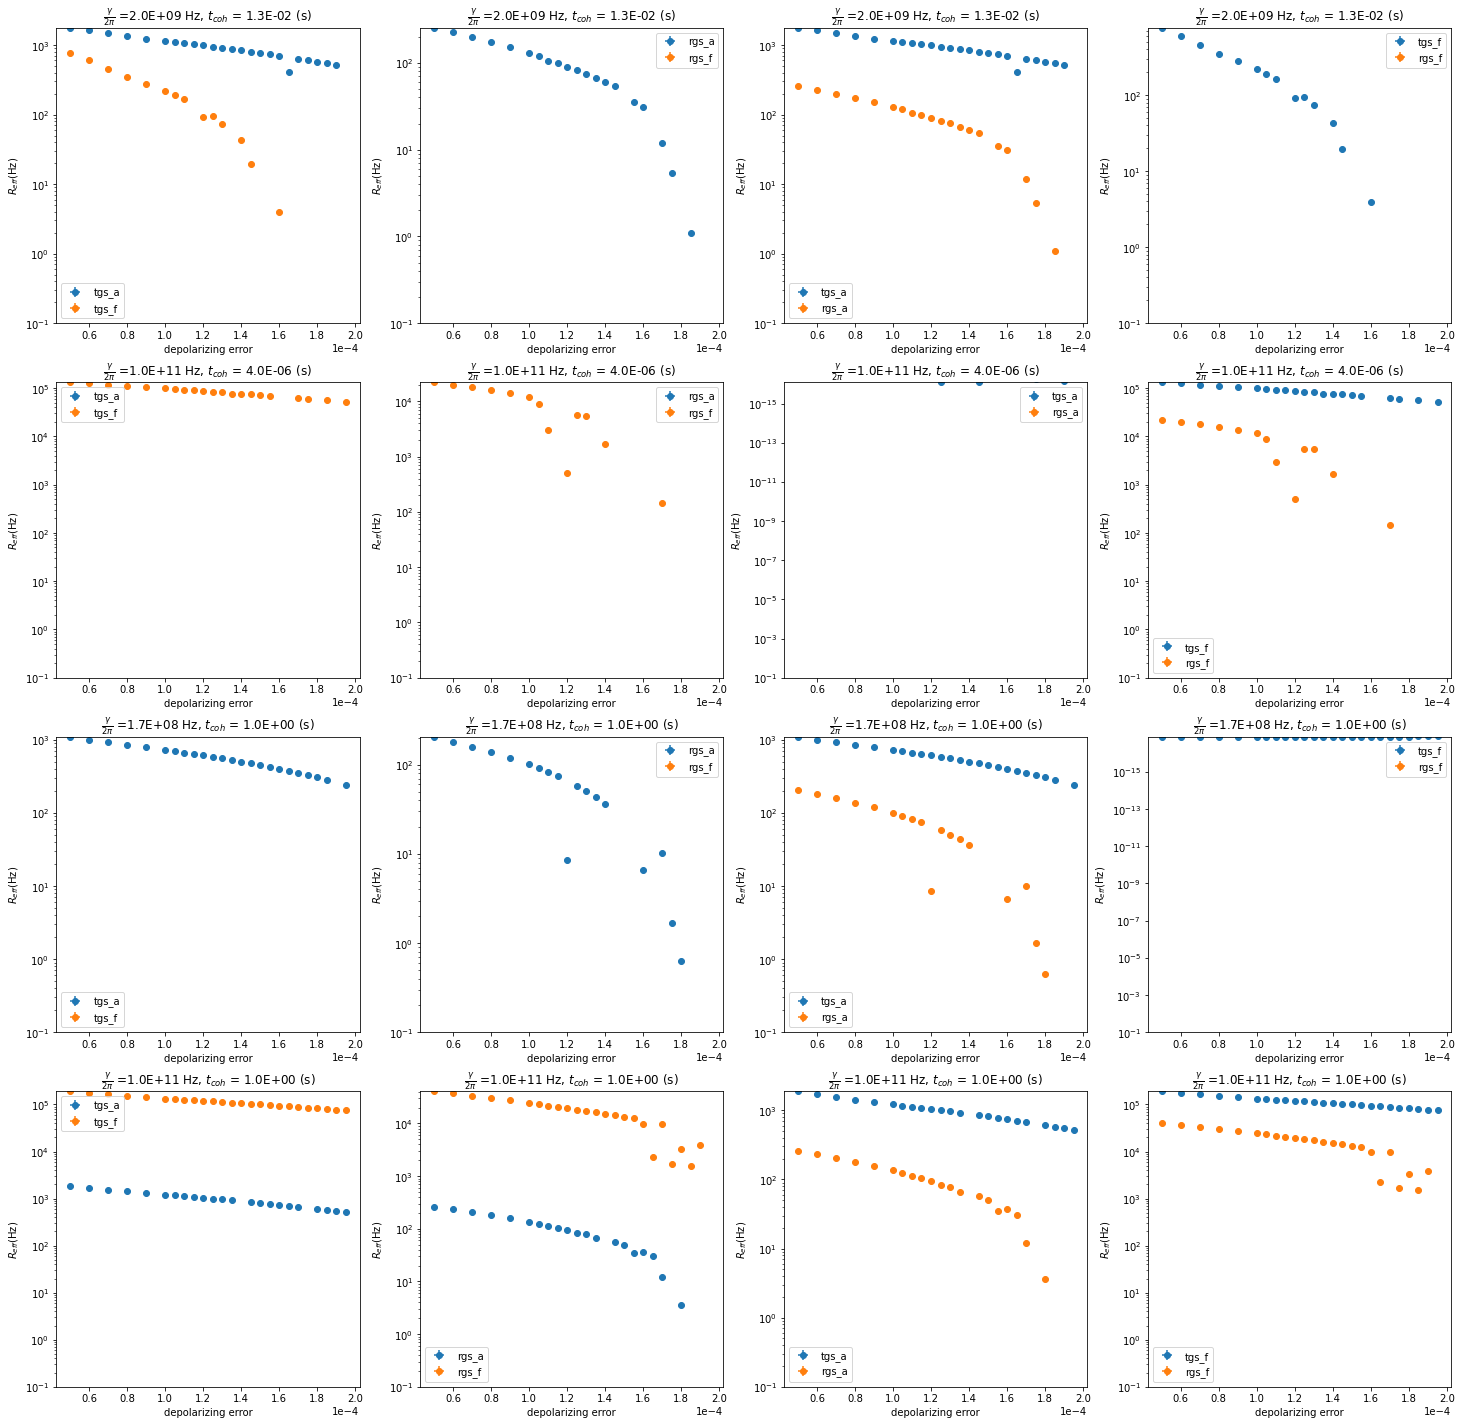

In [168]:
# Distance plot for table 2 (based on what's being compared)
fig, axes = plt.subplots(4, 4, figsize=(25, 25))
comparisons = [('tgs_a', 'tgs_f'), ('rgs_a', 'rgs_f'), ('tgs_a', 'rgs_a'), ('tgs_f', 'rgs_f')]
fig.set_facecolor('white')
for comp_in in range(4):
    comp = comparisons[comp_in]
    for param_in in range(4):
        ax = axes[param_in][comp_in]
        r0 = R_dict[(comp[0], param_in)]
        r1 = R_dict[(comp[1], param_in)]
        ax.errorbar(ep_depol_list, r0, xerr=0, yerr=0, fmt='o', label=comp[0])
        ax.errorbar(ep_depol_list, r1, xerr=0, yerr=0, fmt='o', label=comp[1])
        ax.set_yscale('log')
        ax.set_ylabel("$R_{eff}$" + "(Hz)")
        ax.set_xlabel("depolarizing error")
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax.set_ylim(0.1,max((max(r0), max(r1))))
        ax.set_title("$\\frac{\gamma}{2\pi}$ =" + f"{GAMMA[param_in]/2/np.pi :.1E} Hz, " + 
                     "$t_{coh}$ = " f"{T_SPIN_COHERENCE[param_in]:.1E} (s)")
        ax.legend()
        

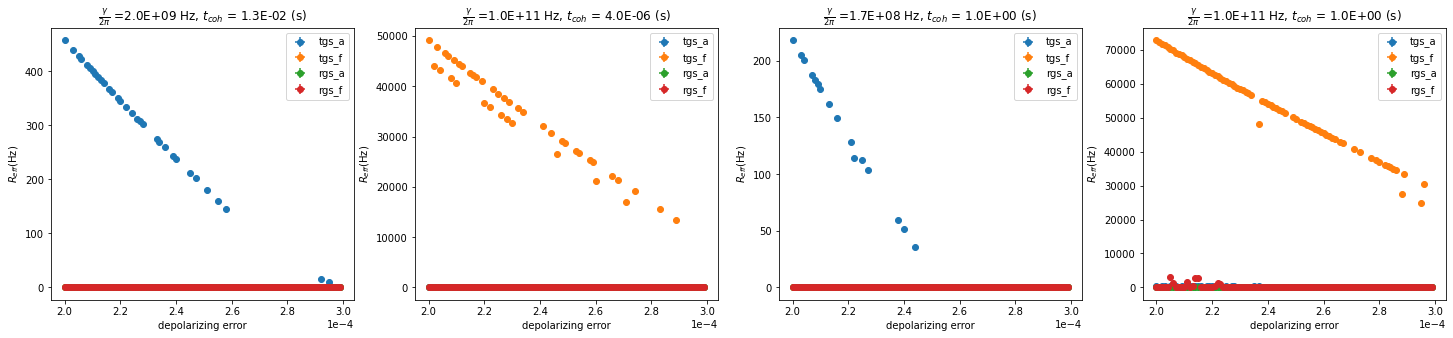

In [185]:
# Distance plot for table 2 (all four protocols in one ax)
fig, axs = plt.subplots(1, 4, figsize=(25,5))
fig.set_facecolor('white')
for param_in in range(4):
        ax = axs[param_in]
        max_r = 0
        for name in names:
            max_r = max(max_r, max(r))
            r = R_dict[(name, param_in)]
            ax.errorbar(ep_depol_list, r, xerr=0, yerr=0, fmt='o', label=name)
            # ax.set_ylim(0.1,max_r)
        ax.set_ylabel("$R_{eff}$" + "(Hz)")
        # ax.set_yscale('log')
        ax.set_xlabel("depolarizing error")
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax.set_title("$\\frac{\gamma}{2\pi}$ =" + f"{GAMMA[param_in]/2/np.pi :.1E} Hz, " + 
                    "$t_{coh}$ = " f"{T_SPIN_COHERENCE[param_in]:.1E} (s)")
        ax.legend()

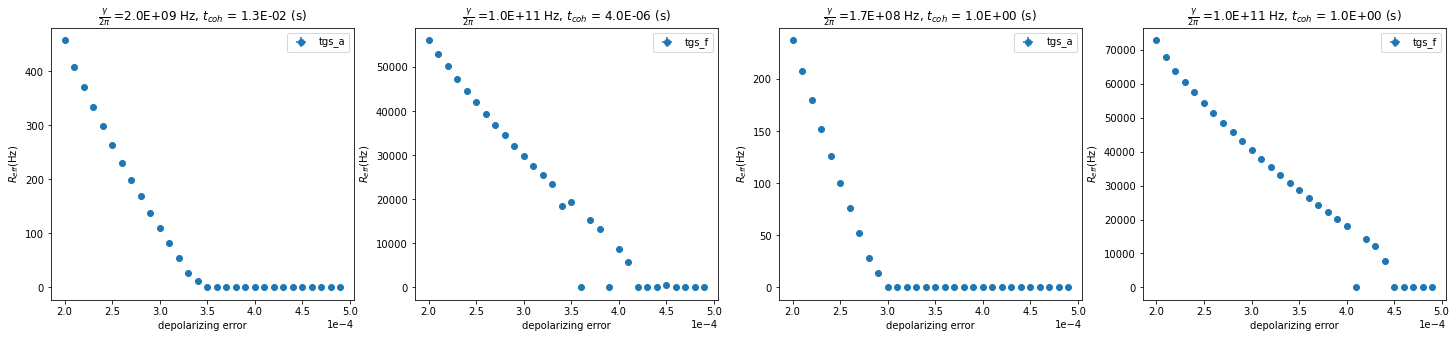

In [195]:
df2 = pd.read_csv("opt_record_ideal_detector_depol_constraint2.csv")
routines = ["<class 'key_rate_optimization.tgs_a_routine'>", "<class 'key_rate_optimization.tgs_f_routine'>"]
names = ['tgs_a', 'tgs_f', 'tgs_a', 'tgs_f']
ep_depol_list = np.arange(2e-4, 5e-4, 0.1e-4)

R_list = []
for i in range(30, 121, 30):
    R_list.append(df2[i-30:i]["best_solutions_fitness"])

fig, axs = plt.subplots(1, 4, figsize=(25,5))
fig.set_facecolor('white')
for param_in in range(4):
        ax = axs[param_in]
        max_r = 0

        r = R_list[param_in]
        ax.errorbar(ep_depol_list, r, xerr=0, yerr=0, fmt='o', label=names[param_in])
            # ax.set_ylim(0.1,max_r)
        ax.set_ylabel("$R_{eff}$" + "(Hz)")
        # ax.set_yscale('log')
        ax.set_xlabel("depolarizing error")
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax.set_title("$\\frac{\gamma}{2\pi}$ =" + f"{GAMMA[param_in]/2/np.pi :.1E} Hz, " + 
                    "$t_{coh}$ = " f"{T_SPIN_COHERENCE[param_in]:.1E} (s)")
        ax.legend()
